In [1]:
import mysql.connector
import pandas as pd
import pandas.io.sql as psql
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
class Pairs:
    def __init__(self):
        self._cnx = mysql.connector.connect(user='xxx', password='xxx', database='pairs')
        self._cursor = self._cnx.cursor()

In [3]:
p = Pairs()

In [4]:
data = psql.read_sql("select * from users;", p._cnx)
data.replace('500+', 500, inplace=True)
data = data.astype({'good': 'int16'})

/home/iwata/myenv/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


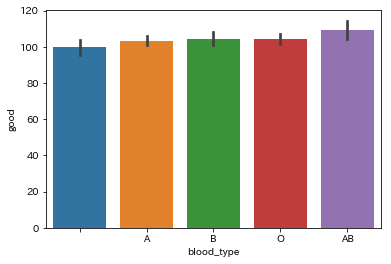

In [5]:
data = data.sort_values(['blood_type']).reset_index(drop=True)
sns.barplot(x='blood_type', y='good', data=data, order=['', 'A', 'B', 'O', 'AB'])

/home/iwata/myenv/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


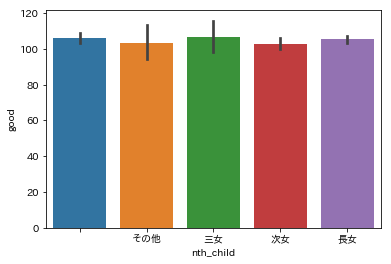

In [6]:
data = data.sort_values(['nth_child']).reset_index(drop=True)
sns.barplot(x='nth_child', y='good', data=data)

/home/iwata/myenv/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


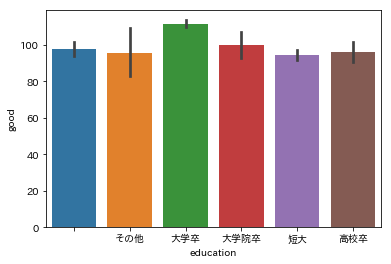

In [7]:
data = data.sort_values(['education']).reset_index(drop=True)
sns.barplot(x='education', y='good', data=data)

/home/iwata/myenv/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0,0,'客室乗務員'),
 Text(0,0,'薬剤師'),
 Text(0,0,'医師'),
 Text(0,0,'秘書'),
 Text(0,0,'建築関連'),
 Text(0,0,'受付'),
 Text(0,0,'経営者'),
 Text(0,0,'製薬'),
 Text(0,0,'コンサル'),
 Text(0,0,'金融'),
 Text(0,0,'大手企業'),
 Text(0,0,'学生'),
 Text(0,0,'大手外資'),
 Text(0,0,'不動産'),
 Text(0,0,'上場企業'),
 Text(0,0,'クリエイター'),
 Text(0,0,'WEB業界'),
 Text(0,0,'広告'),
 Text(0,0,'自由業'),
 Text(0,0,'IT関連'),
 Text(0,0,'公務員'),
 Text(0,0,'ブライダル'),
 Text(0,0,'保険'),
 Text(0,0,'アパレル'),
 Text(0,0,'保育士'),
 Text(0,0,'看護師'),
 Text(0,0,'美容関係'),
 Text(0,0,'事務員'),
 Text(0,0,'通信'),
 Text(0,0,'旅行関係'),
 Text(0,0,'調理師'),
 Text(0,0,'教育関連'),
 Text(0,0,'会社員'),
 Text(0,0,''),
 Text(0,0,'食品関連'),
 Text(0,0,'接客業'),
 Text(0,0,'流通'),
 Text(0,0,'その他'),
 Text(0,0,'エンターテインメント'),
 Text(0,0,'福祉'),
 Text(0,0,'マスコミ')]

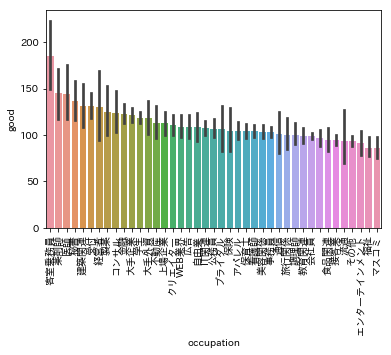

In [8]:
occupation_data = data['occupation'].value_counts().reset_index()
occupation_list = list(occupation_data["index"][occupation_data["occupation"] > 30])
occupation_data = data[data['occupation'].isin(occupation_list)]
occupation_data = occupation_data.groupby(["occupation"])['good'].aggregate(np.mean).reset_index().sort_values('good', ascending=False)
ax = sns.barplot(x='occupation', y="good", data=data, order=occupation_data["occupation"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

/home/iwata/myenv/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0,0,''),
 Text(0,0,'1000万円以上〜1500万円未満'),
 Text(0,0,'1500万円以上〜2000万円未満'),
 Text(0,0,'200万円以上〜400万円未満'),
 Text(0,0,'200万円未満'),
 Text(0,0,'3000万円以上'),
 Text(0,0,'400万円以上〜600万円未満'),
 Text(0,0,'600万円以上〜800万円未満'),
 Text(0,0,'800万円以上〜1000万円未満')]

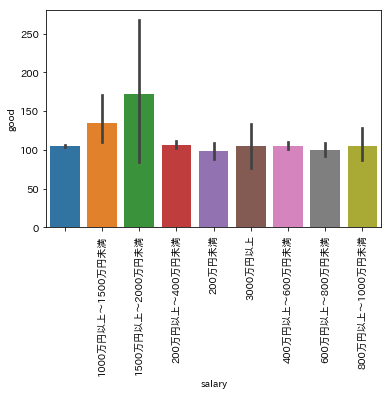

In [9]:
data = data.sort_values(['salary']).reset_index(drop=True)
ax = sns.barplot(x='salary', y='good', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

/home/iwata/myenv/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0,0,''),
 Text(0,0,'145'),
 Text(0,0,'146'),
 Text(0,0,'147'),
 Text(0,0,'148'),
 Text(0,0,'149'),
 Text(0,0,'150'),
 Text(0,0,'151'),
 Text(0,0,'152'),
 Text(0,0,'153'),
 Text(0,0,'154'),
 Text(0,0,'155'),
 Text(0,0,'156'),
 Text(0,0,'157'),
 Text(0,0,'158'),
 Text(0,0,'159'),
 Text(0,0,'160'),
 Text(0,0,'161'),
 Text(0,0,'162'),
 Text(0,0,'163'),
 Text(0,0,'164'),
 Text(0,0,'165'),
 Text(0,0,'166'),
 Text(0,0,'167'),
 Text(0,0,'168'),
 Text(0,0,'169'),
 Text(0,0,'170'),
 Text(0,0,'171'),
 Text(0,0,'172'),
 Text(0,0,'173'),
 Text(0,0,'174'),
 Text(0,0,'175')]

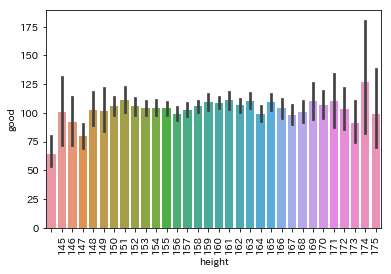

In [10]:
height_data = data['height'].value_counts().reset_index()
height_list = list(height_data["index"][height_data["height"] > 19])
height_data = data[data['height'].isin(height_list)]
height_data = height_data.groupby(["height"])['good'].aggregate(np.mean).reset_index().sort_values('height')
ax = sns.barplot(x='height', y="good", data=data, order=height_data["height"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

/home/iwata/myenv/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0,0,''),
 Text(0,0,'145'),
 Text(0,0,'146'),
 Text(0,0,'147'),
 Text(0,0,'148'),
 Text(0,0,'149'),
 Text(0,0,'150'),
 Text(0,0,'151'),
 Text(0,0,'152'),
 Text(0,0,'153'),
 Text(0,0,'154'),
 Text(0,0,'155'),
 Text(0,0,'156'),
 Text(0,0,'157'),
 Text(0,0,'158'),
 Text(0,0,'159'),
 Text(0,0,'160'),
 Text(0,0,'161'),
 Text(0,0,'162'),
 Text(0,0,'163'),
 Text(0,0,'164'),
 Text(0,0,'165'),
 Text(0,0,'166'),
 Text(0,0,'167'),
 Text(0,0,'168'),
 Text(0,0,'169'),
 Text(0,0,'170'),
 Text(0,0,'171'),
 Text(0,0,'172'),
 Text(0,0,'173'),
 Text(0,0,'174'),
 Text(0,0,'175')]

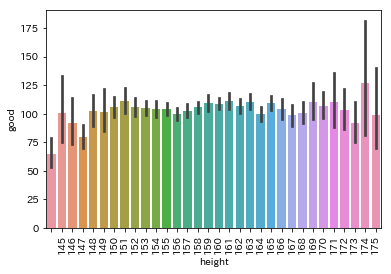

In [11]:
ax = sns.barplot(x='height', y="good", data=data, order=height_data["height"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

/home/iwata/myenv/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0,0,''),
 Text(0,0,'ぽっちゃり'),
 Text(0,0,'ややぽっちゃり'),
 Text(0,0,'やや細め'),
 Text(0,0,'グラマー'),
 Text(0,0,'スリム'),
 Text(0,0,'普通'),
 Text(0,0,'筋肉質')]

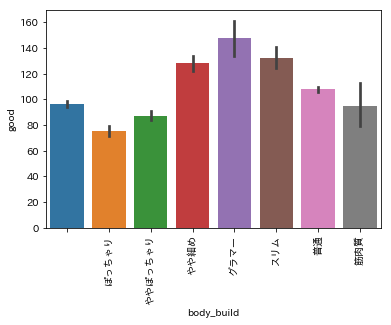

In [12]:
data = data.sort_values(['body_build']).reset_index(drop=True)
ax = sns.barplot(x='body_build', y='good', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

/home/iwata/myenv/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0,0,''), Text(0,0,'未婚'), Text(0,0,'死別'), Text(0,0,'離婚')]

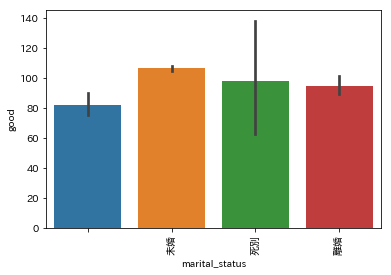

In [13]:
data = data.sort_values(['marital_status']).reset_index(drop=True)
ax = sns.barplot(x='marital_status', y='good', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

/home/iwata/myenv/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0,0,''), Text(0,0,'なし'), Text(0,0,'別居中'), Text(0,0,'同居中')]

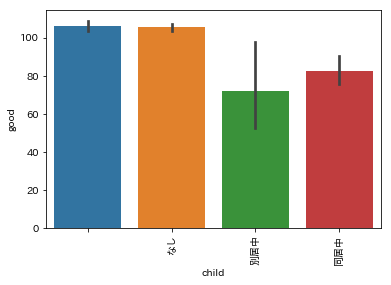

In [14]:
data = data.sort_values(['child']).reset_index(drop=True)
ax = sns.barplot(x='child', y='good', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

/home/iwata/myenv/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0,0,''),
 Text(0,0,'すぐにでもしたい'),
 Text(0,0,'わからない'),
 Text(0,0,'今のところ結婚は考えていない'),
 Text(0,0,'良い人がいればしたい'),
 Text(0,0,'２〜３年のうちに')]

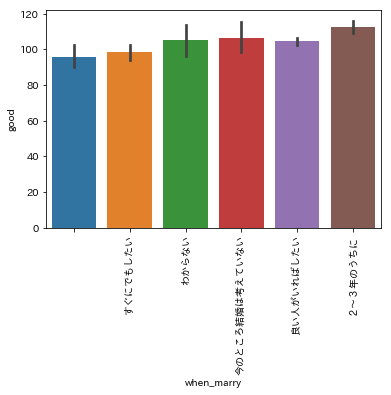

In [15]:
data = data.sort_values(['when_marry']).reset_index(drop=True)
ax = sns.barplot(x='when_marry', y='good', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

/home/iwata/myenv/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0,0,''),
 Text(0,0,'いいえ'),
 Text(0,0,'はい'),
 Text(0,0,'わからない'),
 Text(0,0,'相手と相談して決める')]

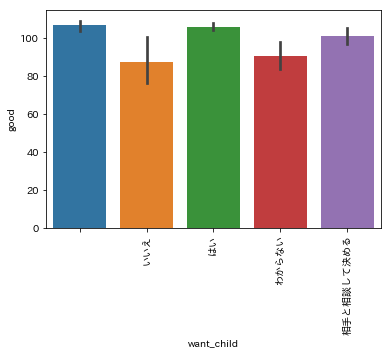

In [16]:
data = data.sort_values(['want_child']).reset_index(drop=True)
ax = sns.barplot(x='want_child', y='good', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

/home/iwata/myenv/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0,0,''),
 Text(0,0,'できれば参加したい'),
 Text(0,0,'できれば相手に任せたい'),
 Text(0,0,'相手に任せたい'),
 Text(0,0,'積極的に参加したい')]

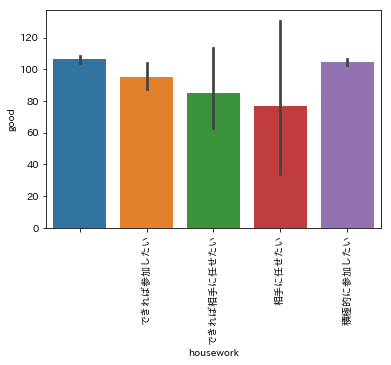

In [17]:
data = data.sort_values(['housework']).reset_index(drop=True)
ax = sns.barplot(x='housework', y='good', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

/home/iwata/myenv/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0,0,''),
 Text(0,0,'マッチング後にまずは会いたい'),
 Text(0,0,'メッセージを重ねてから会いたい'),
 Text(0,0,'気が合えば会いたい')]

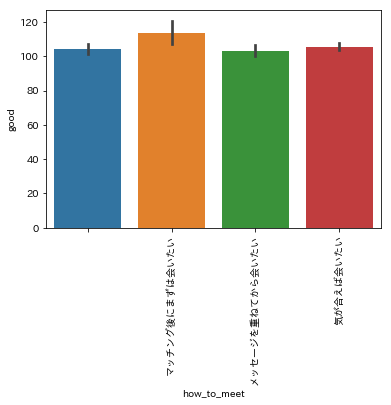

In [18]:
data = data.sort_values(['how_to_meet']).reset_index(drop=True)
ax = sns.barplot(x='how_to_meet', y='good', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

/home/iwata/myenv/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0,0,''),
 Text(0,0,'割り勘'),
 Text(0,0,'持っている方が払う'),
 Text(0,0,'男性が全て払う'),
 Text(0,0,'男性が多めに払う'),
 Text(0,0,'相手と相談して決める')]

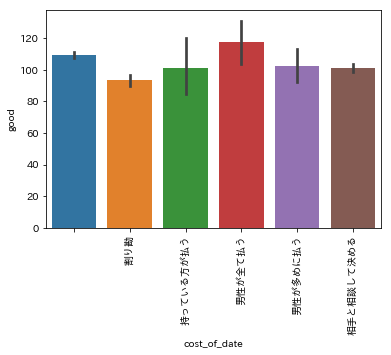

In [19]:
data = data.sort_values(['cost_of_date']).reset_index(drop=True)
ax = sns.barplot(x='cost_of_date', y='good', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

/home/iwata/myenv/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0,0,''),
 Text(0,0,'すぐに仲良くなる'),
 Text(0,0,'一人が好き'),
 Text(0,0,'大人数が好き'),
 Text(0,0,'少人数が好き'),
 Text(0,0,'徐々に仲良くなる')]

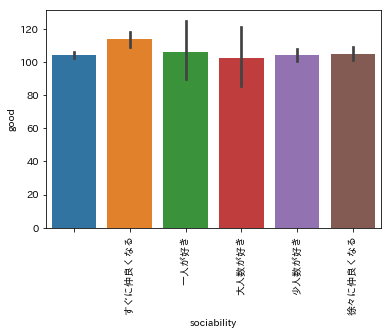

In [20]:
data = data.sort_values(['sociability']).reset_index(drop=True)
ax = sns.barplot(x='sociability', y='good', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

/home/iwata/myenv/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0,0,''),
 Text(0,0,'その他'),
 Text(0,0,'ペットと一緒'),
 Text(0,0,'一人暮らし'),
 Text(0,0,'友達と一緒'),
 Text(0,0,'実家暮らし')]

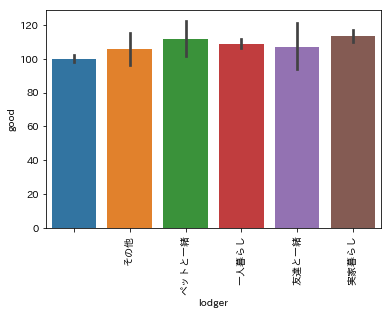

In [21]:
data = data.sort_values(['lodger']).reset_index(drop=True)
ax = sns.barplot(x='lodger', y='good', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

/home/iwata/myenv/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0,0,''),
 Text(0,0,'その他'),
 Text(0,0,'不定期'),
 Text(0,0,'土日'),
 Text(0,0,'平日')]

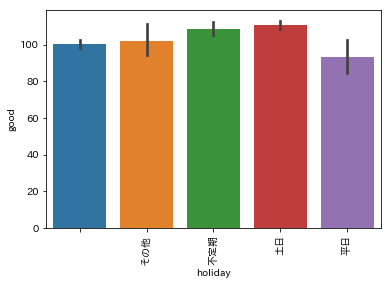

In [22]:
data = data.sort_values(['holiday']).reset_index(drop=True)
ax = sns.barplot(x='holiday', y='good', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

/home/iwata/myenv/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0,0,''), Text(0,0,'ときどき飲む'), Text(0,0,'飲まない'), Text(0,0,'飲む')]

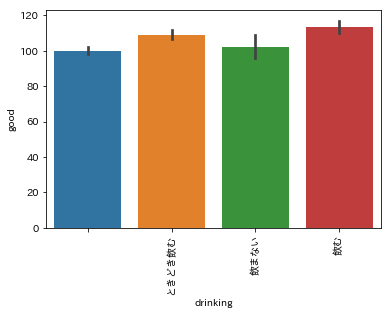

In [23]:
data = data.sort_values(['drinking']).reset_index(drop=True)
ax = sns.barplot(x='drinking', y='good', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

/home/iwata/myenv/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0,0,''),
 Text(0,0,'ときどき吸う'),
 Text(0,0,'吸う'),
 Text(0,0,'吸う（電子タバコ）'),
 Text(0,0,'吸わない'),
 Text(0,0,'相手が嫌ならやめる'),
 Text(0,0,'非喫煙者の前では吸わない')]

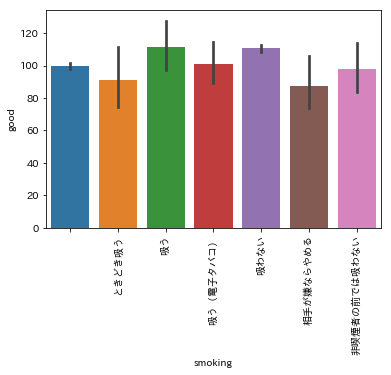

In [24]:
data = data.sort_values(['smoking']).reset_index(drop=True)
ax = sns.barplot(x='smoking', y='good', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

In [26]:
#1. id, language1~5, natinality, goodを抽出する
nationality_columns = data.columns[data.columns.str.contains('^id|good|nationality|home')]
#1. 1ヶ国語、2ヶ国語、3ヶ国語以上話せる人を抽出する(nationalityが"日本"or""のデータも含む)
nationality_data = pd.DataFrame(columns=["id", "nationality", "good"])
#1行毎取り出す
for _, row in data[nationality_columns].iterrows():
    if row["nationality"] == "日本" or row["home"] == "日本":
        nationality = "日本"
    else:
        nationality = "海外"
    list_append1 = []
    list_append2 = []
    list_append1.insert(0, row["id"])
    list_append1.append(nationality)
    list_append1.append(row["good"])
    list_append2.append(list_append1)
    df_append = pd.DataFrame(list_append2, columns=["id", "nationality", "good"])
    nationality_data = nationality_data.append(df_append)

/home/iwata/myenv/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


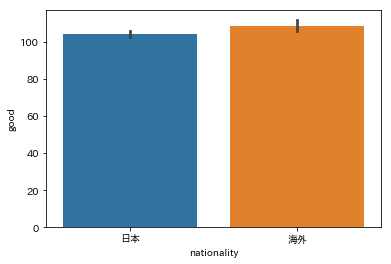

In [27]:
nationality_data = nationality_data.sort_values(['nationality']).reset_index(drop=True)
sns.barplot(x='nationality', y='good', data=nationality_data)

In [28]:
#1. id, language1~5, natinality, goodを抽出する
language_columns = data.columns[data.columns.str.contains('language|^id|good|nationality')]
#1. 1ヶ国語、2ヶ国語、3ヶ国語以上話せる人を抽出する(nationalityが"日本"or""のデータも含む)
df_language = pd.DataFrame(columns=["id", "language", "num_language", "good"])
#1行毎取り出す
for index_org, row in data[language_columns].iterrows():
    #1. 言語をタプルでまとめる。
    list_append1 = [sorted([x for x in set(row[3:7]) if x])]
    num_language = len([b for a in list_append1 for b in a])
    list_append2 = []
    list_append1.insert(0, row["id"])
    list_append1.append(num_language)
    list_append1.append(row["good"])
    list_append2.append(list_append1)
    df_append = pd.DataFrame(list_append2, columns=["id", "language", "num_language", "good"])
    df_language = df_language.append(df_append)

/home/iwata/myenv/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


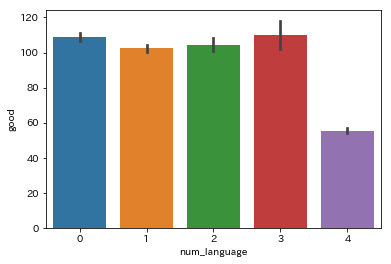

In [29]:
df_language = df_language.sort_values(['num_language']).reset_index(drop=True)
sns.barplot(x='num_language', y='good', data=df_language)

/home/iwata/myenv/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0,0,"['スペイン語', '日本語', '英語']"),
 Text(0,0,"['英語']"),
 Text(0,0,"['日本語', '韓国語']"),
 Text(0,0,"['フランス語', '日本語', '英語']"),
 Text(0,0,"['フランス語', '日本語']"),
 Text(0,0,"['日本語', '英語', '韓国語']"),
 Text(0,0,'[]'),
 Text(0,0,"['中国語', '日本語', '英語']"),
 Text(0,0,"['日本語', '英語']"),
 Text(0,0,"['中国語', '日本語']"),
 Text(0,0,"['日本語']"),
 Text(0,0,"['ドイツ語', '日本語', '英語']")]

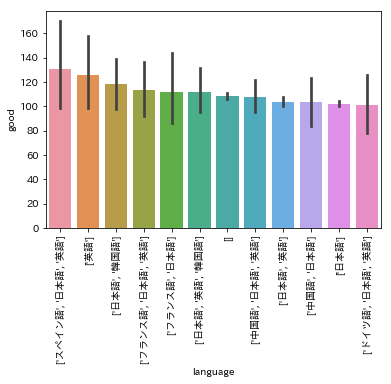

In [30]:
df_language = df_language.astype({'language': 'str', 'good': 'int16'})
language_data = df_language['language'].value_counts().reset_index()
language_list = list(language_data["index"][language_data["language"] > 29])
language_data = df_language[df_language['language'].isin(language_list)]
language_data = language_data.groupby(["language"])['good'].aggregate(np.mean).reset_index().sort_values('good', ascending=False)
ax = sns.barplot(x='language', y="good", data=df_language, order=language_data["language"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

In [31]:
language_data

,language,good
0,"['スペイン語', '日本語', '英語']",130.977778
10,['英語'],125.723684
8,"['日本語', '韓国語']",118.260504
2,"['フランス語', '日本語', '英語']",113.274510
3,"['フランス語', '日本語']",112.000000
6,"['日本語', '英語', '韓国語']",111.989583
11,[],108.812284
4,"['中国語', '日本語', '英語']",107.933628
7,"['日本語', '英語']",103.866502
5,"['中国語', '日本語']",103.660550


/home/iwata/myenv/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0,0,'21'),
 Text(0,0,'22'),
 Text(0,0,'23'),
 Text(0,0,'24'),
 Text(0,0,'25'),
 Text(0,0,'26'),
 Text(0,0,'27'),
 Text(0,0,'28'),
 Text(0,0,'29'),
 Text(0,0,'30'),
 Text(0,0,'31'),
 Text(0,0,'32'),
 Text(0,0,'33'),
 Text(0,0,'34'),
 Text(0,0,'35'),
 Text(0,0,'36'),
 Text(0,0,'37'),
 Text(0,0,'38')]

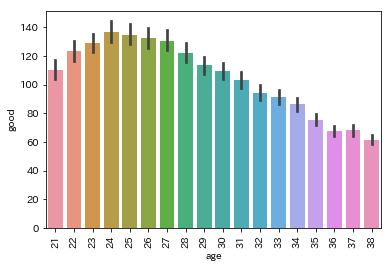

In [32]:
data = data.sort_values(['age']).reset_index(drop=True)
ax = sns.barplot(x='age', y='good', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

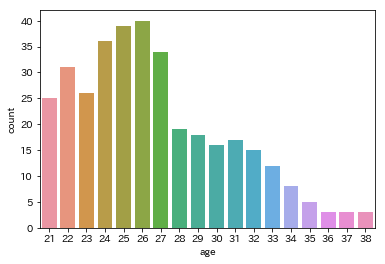

In [33]:
good_data = data.query("good == 500")
sns.countplot(x="age", data=good_data)

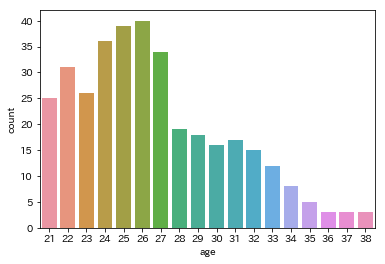

In [34]:
sns.countplot(x="age", data=good_data)

In [35]:
#1. id, language1~5, natinality, goodを抽出する
introduction_columns = data.columns[data.columns.str.contains('^id|introduction|good')]
df_len = pd.DataFrame(columns=["id", "introduction", "len_introduction", "good"])
#1行毎取り出す
for index_org, row in data[introduction_columns].iterrows():
    #1. 言語をタプルでまとめる。
    if 0 <= len(row["introduction"]) <= 100:
        len_introduction = "0 ~ 100"
    elif 101 <= len(row["introduction"]) <= 200:
        len_introduction = "101 ~ 200"
    elif 201 <= len(row["introduction"]) <= 300:
        len_introduction = "201 ~ 300"
    elif 301 <= len(row["introduction"]) <= 400:
        len_introduction = "301 ~ 400"
    elif 401 <= len(row["introduction"]) <= 500:
        len_introduction = "401 ~ 500"
    elif 501 <= len(row["introduction"]) <= 600:
        len_introduction = "501 ~ 600"
    elif 601 <= len(row["introduction"]) <= 700:
        len_introduction = "601 ~ 700"
    elif 701 <= len(row["introduction"]) <= 800:
        len_introduction = "701 ~ 800"
    elif 801 <= len(row["introduction"]) <= 900:
        len_introduction = "801 ~ 900"
    else:
        len_introduction = "901 ~"
    list_append1 = []
    list_append2 = []
    list_append1.insert(0, row["id"])
    list_append1.append(row["introduction"])
    list_append1.append(len_introduction)
    list_append1.append(row["good"])
    list_append2.append(list_append1)
    df_append = pd.DataFrame(list_append2, columns=["id", "introduction", "len_introduction", "good"])
    df_len = df_len.append(df_append)

/home/iwata/myenv/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0,0,'0 ~ 100'),
 Text(0,0,'101 ~ 200'),
 Text(0,0,'201 ~ 300'),
 Text(0,0,'301 ~ 400'),
 Text(0,0,'401 ~ 500'),
 Text(0,0,'501 ~ 600'),
 Text(0,0,'601 ~ 700'),
 Text(0,0,'701 ~ 800'),
 Text(0,0,'801 ~ 900'),
 Text(0,0,'901 ~')]

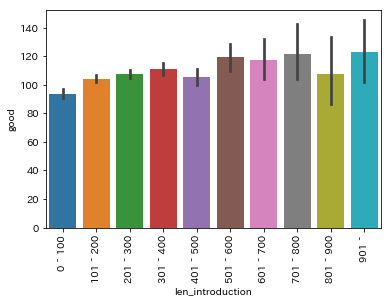

In [36]:
df_len = df_len.sort_values(['len_introduction']).reset_index(drop=True)
ax = sns.barplot(x='len_introduction', y='good', data=df_len)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

In [37]:
def get_unique_list(seq):
    seen = []
    return [x for x in seq if x not in seen and not seen.append(x)]

In [38]:
#id, pictureカラムのみ抽出
picture_columns = data.columns[data.columns.str.contains('picture|^id|good')]
df_picture = pd.DataFrame(columns=["id", "good", "num_picture", "picture1", "picture2", "picture3", "picture4", "picture5", "picture6", "picture7", "picture8", "picture9", "picture10", "picture11", "picture12", "picture13", "picture14", "picture15", "picture16", "picture17", "picture18", "picture19", "picture20", "picture21", "picture22", "picture23", "picture24", "picture25", "picture26", "picture27", "picture28", "picture29", "picture30", "picture31", "picture32", "picture33", "picture34", "picture35", "picture36", "picture37", "picture38", "picture39", "picture40", "picture41", "picture42", "picture43", "picture44", "picture45", "picture46", "picture47", "picture48", "picture49", "picture50", "picture51", "picture52", "picture53", "picture54", "picture55", "picture56", "picture57", "picture58", "picture59", "picture60", "picture61", "picture62", "picture63", "picture64", "picture65", "picture66", "picture67", "picture68", "picture69", "picture70"])
#1行毎取り出す
for index_org, row in data[picture_columns].iterrows():
    #空白、nullを取り除く
    removed_space_and_null = [x for x in row if x]
    #元のリストの順序を保持する
    update_pictures = get_unique_list(removed_space_and_null[2:-1])
    #リストの先頭にidを挿入する
    update_pictures.insert(0, len(update_pictures))
    update_pictures.insert(0, removed_space_and_null[0])
    update_pictures.insert(1, row["good"])
    #update_picturesを""でパディング
    update_pictures[len(update_pictures):73] = [""] * (73 - len(update_pictures))
    two_dimention_pictures = []
    two_dimention_pictures.append(update_pictures)
    df_append = pd.DataFrame(two_dimention_pictures, columns=["id", "good", "num_picture", "picture1", "picture2", "picture3", "picture4", "picture5", "picture6", "picture7", "picture8", "picture9", "picture10", "picture11", "picture12", "picture13", "picture14", "picture15", "picture16", "picture17", "picture18", "picture19", "picture20", "picture21", "picture22", "picture23", "picture24", "picture25", "picture26", "picture27", "picture28", "picture29", "picture30", "picture31", "picture32", "picture33", "picture34", "picture35", "picture36", "picture37", "picture38", "picture39", "picture40", "picture41", "picture42", "picture43", "picture44", "picture45", "picture46", "picture47", "picture48", "picture49", "picture50", "picture51", "picture52", "picture53", "picture54", "picture55", "picture56", "picture57", "picture58", "picture59", "picture60", "picture61", "picture62", "picture63", "picture64", "picture65", "picture66", "picture67", "picture68", "picture69", "picture70"])
    df_picture = df_picture.append(df_append)

/home/iwata/myenv/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0,0,'1'),
 Text(0,0,'2'),
 Text(0,0,'3'),
 Text(0,0,'4'),
 Text(0,0,'5'),
 Text(0,0,'6'),
 Text(0,0,'7'),
 Text(0,0,'8'),
 Text(0,0,'9'),
 Text(0,0,'10'),
 Text(0,0,'11'),
 Text(0,0,'12'),
 Text(0,0,'13'),
 Text(0,0,'14'),
 Text(0,0,'15'),
 Text(0,0,'16'),
 Text(0,0,'17'),
 Text(0,0,'18'),
 Text(0,0,'19'),
 Text(0,0,'20'),
 Text(0,0,'21'),
 Text(0,0,'22'),
 Text(0,0,'23'),
 Text(0,0,'24'),
 Text(0,0,'25'),
 Text(0,0,'26'),
 Text(0,0,'27'),
 Text(0,0,'29'),
 Text(0,0,'31'),
 Text(0,0,'32'),
 Text(0,0,'33'),
 Text(0,0,'40')]

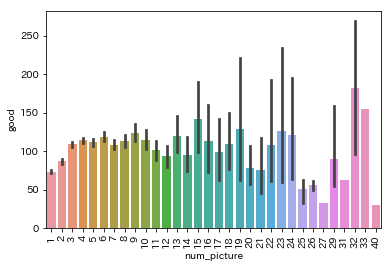

In [39]:
df_picture = df_picture.sort_values(['num_picture']).reset_index(drop=True)
ax = sns.barplot(x='num_picture', y='good', data=df_picture)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

[Text(0,0,'明るい'),
 Text(0,0,'マイペース'),
 Text(0,0,'素直'),
 Text(0,0,'親しみやすい'),
 Text(0,0,'いつも笑顔'),
 Text(0,0,'好奇心旺盛'),
 Text(0,0,'真面目'),
 Text(0,0,'穏やか'),
 Text(0,0,'優しい'),
 Text(0,0,'さびしがり'),
 Text(0,0,'照れ屋'),
 Text(0,0,'楽観的'),
 Text(0,0,'落ち着いている'),
 Text(0,0,'裏表がない'),
 Text(0,0,'アウトドア'),
 Text(0,0,'聞き上手'),
 Text(0,0,'思いやりがある'),
 Text(0,0,'インドア'),
 Text(0,0,'責任感がある'),
 Text(0,0,'仕事好き'),
 Text(0,0,'社交的'),
 Text(0,0,'天然と言われる'),
 Text(0,0,'負けず嫌い'),
 Text(0,0,'面倒見が良い'),
 Text(0,0,'行動的'),
 Text(0,0,'誠実'),
 Text(0,0,'奥手'),
 Text(0,0,'家庭的'),
 Text(0,0,'気分屋'),
 Text(0,0,'決断力がある'),
 Text(0,0,'寛容'),
 Text(0,0,'面白い'),
 Text(0,0,'気が利く'),
 Text(0,0,'マメ'),
 Text(0,0,'謙虚'),
 Text(0,0,'几帳面'),
 Text(0,0,'合理的'),
 Text(0,0,'話し上手'),
 Text(0,0,'冷静沈着'),
 Text(0,0,'大胆'),
 Text(0,0,'上品'),
 Text(0,0,'熱い'),
 Text(0,0,'知的'),
 Text(0,0,'気前がいい'),
 Text(0,0,'さわやか'),
 Text(0,0,'厳格')]

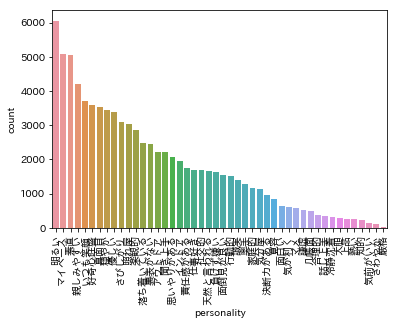

In [40]:
df_stack_personality = data.loc[:, "personality1":"personality46"].stack()
df_personlaity = pd.DataFrame()
df_personlaity = pd.concat([df_personlaity, pd.DataFrame(df_stack_personality, columns=["personality"])], axis=1)
df_personlaity.drop(df_personlaity.index[df_personlaity.personality == ''], inplace=True)
ax = sns.countplot(x="personality", data=df_personlaity, order = df_personlaity['personality'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

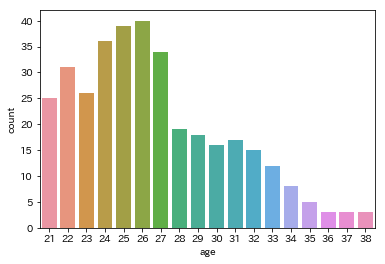

In [41]:
good_data = data.query("good == 500")
sns.countplot(x="age", data=good_data)

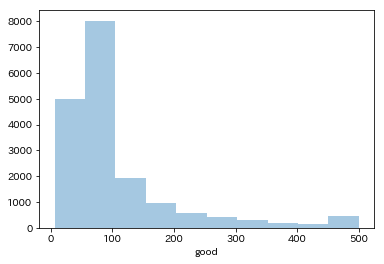

In [42]:
sns.distplot(data["good"], kde=False, rug=False, bins=10) 